In [1]:
import pandas as pd

priorizationFile = "capsone.xlsx"
datasetFile = "Results.csv"

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
priorization = pd.read_excel(priorizationFile)
priorization.head()

,Type,Name,Label,Priority
0,Mental,cc_addictionproblem,addiction problem,61
1,Mental,cc_agitation,agitation,41
2,Mental,cc_alcoholproblem,alcohol problem,63
3,Mental,cc_anxiety,anxiety,52
4,Mental,cc_depression,depression,53


In [3]:
dataset = pd.read_csv(datasetFile)
dataset.head()

,Unnamed: 0,dep_name,esi,age,gender,ethnicity,race,lang,religion,maritalstatus,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
0,0,B,4.0,40.0,Male,Hispanic or Latino,White or Caucasian,English,NaN,Single,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,B,4.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,B,2.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,A,2.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,A,3.0,84.0,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# filter non used columns
columns = priorization['Name'].tolist()
datasetFiltered = dataset[columns]
datasetFiltered.head()

,cc_addictionproblem,cc_agitation,cc_alcoholproblem,cc_anxiety,cc_depression,cc_detoxevaluation,cc_hallucinations,cc_homicidal,cc_panicattack,cc_psychoticsymptoms,...,cc_abdominalpainpregnant,cc_constipation,cc_diarrhea,cc_epigastricpain,cc_hematuria,cc_hemoptysis,cc_nausea,cc_flankpain,cc_rectalbleeding,cc_rectalpain
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Replace all numbers in the columns with True or False
datasetBoolean = datasetFiltered[columns] != 0
len(datasetBoolean)

560486

In [6]:
# Delete all rows that have only False
datasetBoolean = datasetBoolean.loc[(datasetBoolean != False).any(axis=1)]
len(datasetBoolean)

434859

In [7]:
datasetTemp = datasetBoolean.copy()

for column in datasetTemp.columns:
    if column in priorization['Name'].values:
        priority_value = priorization.loc[priorization['Name'] == column, 'Priority'].iloc[0]
        # Replace values in df2 with priority values if not equal to 0
        datasetTemp[column] = datasetTemp[column].apply(lambda x: priority_value if x != False else 0)

# Create a new column with the sum of columns present in priorization['Name']
datasetTemp['result'] = datasetTemp[priorization['Name']].sum(axis=1)

finalDataset = pd.concat([datasetBoolean, datasetTemp['result']], axis=1)
finalDataset.head()

/tmp/ipykernel_207051/593401516.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  datasetTemp['result'] = datasetTemp[priorization['Name']].sum(axis=1)


,cc_addictionproblem,cc_agitation,cc_alcoholproblem,cc_anxiety,cc_depression,cc_detoxevaluation,cc_hallucinations,cc_homicidal,cc_panicattack,cc_psychoticsymptoms,...,cc_constipation,cc_diarrhea,cc_epigastricpain,cc_hematuria,cc_hemoptysis,cc_nausea,cc_flankpain,cc_rectalbleeding,cc_rectalpain,result
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,68
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,71
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,77
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,68
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,91


In [8]:
# Calculate the first quartile (Q1) and third quartile (Q3)
lowerQ = finalDataset['result'].quantile(0.15)
upperQ = finalDataset['result'].quantile(0.85)

# Calculate the Interquartile Range (IQR)
IQR = upperQ - lowerQ

# Define the lower and upper bounds
lower_bound = lowerQ - 1.5 * IQR
upper_bound = upperQ + 1.5 * IQR

prunedDataset = finalDataset[(finalDataset['result'] >= lower_bound) & (finalDataset['result'] <= upper_bound)]

In [9]:
# finalDataset.to_csv('modified_dataframe.csv', index=False)

In [10]:
X = prunedDataset.drop(columns=['result'])
y = prunedDataset['result']

In [11]:
random_state = 0 
test_size = 0.2
train_size = 0.8

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, train_size=train_size, random_state=random_state)

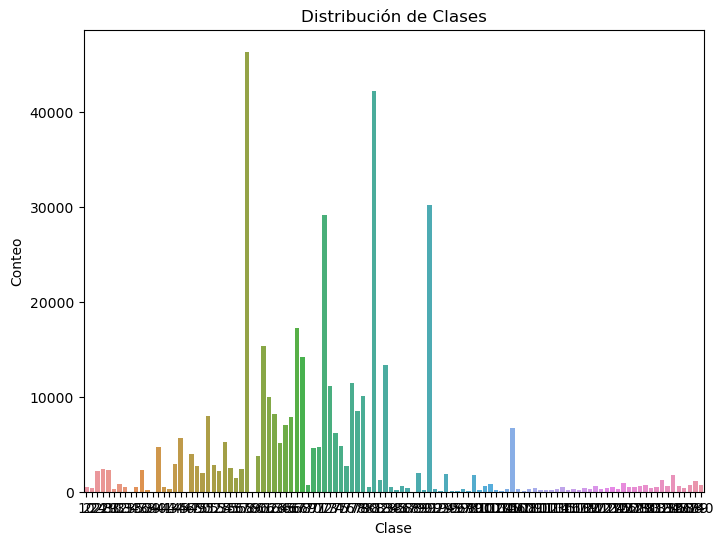

In [12]:
# Encode Categoric Variables
# df_encoded = pd.get_dummies(df_witout_nunique)

# Handling Null values
# imputer = SimpleImputer(strategy='most_frequent')
# df_without_null = imputer.fit_transform(df_witout_nunique)

# Create DataFrame With Encoded Labels and Characteristics
df_plot = X.copy()
df_plot['emergency_flag'] = y

# Plot Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='emergency_flag', data=df_plot)
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Conteo')
plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Train the Model
model = RandomForestClassifier(n_estimators=100, random_state=random_state)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Validating the Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Get Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
FP = confusion[0, 1]
TN = confusion[0, 0]
FN = confusion[1, 0]

In [15]:
# Accuracy is the proportion of correctly classified samples out of the total number of samples:
accuracy

0.9968092750234433

In [16]:
# This represents the count of true positive predictions, where the model correctly predicts positive instances:
TP

80

In [17]:
# This represents the count of false positive predictions, where the model incorrectly predicts positive instances:
FP

0

In [18]:
# This represents the count of true negative predictions, where the model correctly predicts negative instances:
TN

101

In [19]:
# This represents the count of false negative predictions, where the model incorrectly predicts negative instances: 
FN

0

In [20]:
# Precision: Precision measures the accuracy of the positive predictions. It is the ratio of correctly predicted positive observations to the total predicted positives. Precision = TP / (TP + FP).
precision = TP / (TP + FP)
precision

1.0

In [21]:
# Recall (Sensitivity): Recall measures the proportion of actual positive cases that were correctly identified by the model. It is the ratio of correctly predicted positive observations to the all observations in actual class. Recall = TP / (TP + FN).
recall = TP / (TP + FN)
recall

1.0

In [22]:
# F1 Score: The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall. F1 Score = 2 * (Precision * Recall) / (Precision + Recall).
F1 = 2 * (precision * recall) / (precision + recall)
F1

1.0

In [23]:
# Specificity: Specificity measures the proportion of actual negative cases that were correctly identified by the model. Specificity = TN / (TN + FP).
specificity = TN / (TN + FP)
specificity

1.0

In [24]:
# False Positive Rate (FPR): FPR measures the proportion of actual negative cases that were incorrectly classified as positive. FPR = FP / (FP + TN).
FPR = FP / (FP + TN)
FPR

0.0

In [25]:
# The input file shows a example of the cases that a receptionist could have
input = pd.read_csv("inputDataframe.csv")
input.head()

,cc_addictionproblem,cc_agitation,cc_alcoholproblem,cc_anxiety,cc_depression,cc_detoxevaluation,cc_hallucinations,cc_homicidal,cc_panicattack,cc_psychoticsymptoms,...,cc_abdominalpainpregnant,cc_constipation,cc_diarrhea,cc_epigastricpain,cc_hematuria,cc_hemoptysis,cc_nausea,cc_flankpain,cc_rectalbleeding,cc_rectalpain
0,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
for index, row in input.iterrows():
    # Extract column names where value is True
    true_columns = input.columns[row].tolist()
    # Print the result
    print(f"{index}: {', '.join(true_columns)}")

0: cc_depression, cc_hallucinations, cc_abscess, cc_alcoholintoxication
1: cc_lethargy, cc_lossofconsciousness, cc_ribinjury
2: cc_drugproblem, cc_fall, cc_fatigue, cc_headinjury
3: cc_bodyfluidexposure, cc_burn, cc_cellulitis, cc_skinproblem, cc_woundcheck, cc_woundinfection
4: cc_urinaryretention, cc_urinarytractinfection, cc_earpain, cc_earproblem, cc_eyeproblem


In [27]:
result = model.predict(input)

result

array([136,  79, 140, 107,  89])

In [28]:
# We add the result to the patients
input['result'] = result

# Sort the patients for priority 
ordered_df = input.sort_values(by='result', ascending=False)

# Remove again result to have a dataframe with only booleans
ordered_df = ordered_df.drop(columns=['result'])

for index, row in ordered_df.iterrows():
    # Extract column names where value is True
    true_columns = ordered_df.columns[row].tolist()
    # Print the result
    print(f"{index}: {', '.join(true_columns)}")

2: cc_drugproblem, cc_fall, cc_fatigue, cc_headinjury
0: cc_depression, cc_hallucinations, cc_abscess, cc_alcoholintoxication
3: cc_bodyfluidexposure, cc_burn, cc_cellulitis, cc_skinproblem, cc_woundcheck, cc_woundinfection
4: cc_urinaryretention, cc_urinarytractinfection, cc_earpain, cc_earproblem, cc_eyeproblem
1: cc_lethargy, cc_lossofconsciousness, cc_ribinjury
